In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
df = pd.read_excel("klm.xlsx")
df

,ΑΜ,Φυσικό 1,Φυσικό 2,Φυσικό 3,Εικονικό 1,Εικονικό 2,Εικονικό 3
0,1053655,67639,69813,62928,106826.0,110781,110799
1,1066445,71384,69987,57879,109600.0,103671,105381
2,1048363,91119,78656,76067,111968.0,101393,100260
3,1072752,62549,53299,50532,78155.0,80907,77418
4,1072682,114237,112927,95038,143502.0,129865,113904
5,1072899,79158,79071,68322,150677.0,136318,134577
6,1072894,114798,85281,89260,NaN,122693,108364
7,1072801,69824,59906,50635,148126.0,96453,88720
8,1072792,80904,67209,65530,112715.0,116885,115065
9,1080568,130011,66525,69504,110339.0,97243,97923


In [43]:
df.describe()

,Φυσικό 1,Φυσικό 2,Φυσικό 3,Εικονικό 1,Εικονικό 2,Εικονικό 3
count,37.000000,37.000000,37.000000,36.000000,37.000000,37.000000
mean,87509.000000,76286.621622,69022.540541,116285.888889,105541.513514,100890.432432
std,23037.220714,17311.379673,15101.667370,18845.716186,15710.366702,15149.653708
min,47328.000000,36203.000000,36250.000000,63397.000000,59978.000000,57623.000000
25%,74100.000000,68437.000000,62928.000000,107984.000000,97243.000000,95684.000000
50%,87365.000000,78048.000000,68870.000000,116041.000000,103709.000000,100520.000000
75%,95662.000000,83380.000000,79358.000000,126724.500000,116885.000000,108364.000000
max,164042.000000,112927.000000,96326.000000,150677.000000,136318.000000,134577.000000


In [44]:
df_stats = df.describe().round().drop('25%').drop('50%').drop('75%').drop('min').drop('max')
df_stats

,Φυσικό 1,Φυσικό 2,Φυσικό 3,Εικονικό 1,Εικονικό 2,Εικονικό 3
count,37.0,37.0,37.0,36.0,37.0,37.0
mean,87509.0,76287.0,69023.0,116286.0,105542.0,100890.0
std,23037.0,17311.0,15102.0,18846.0,15710.0,15150.0


C:\Users\apnev\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\apnev\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


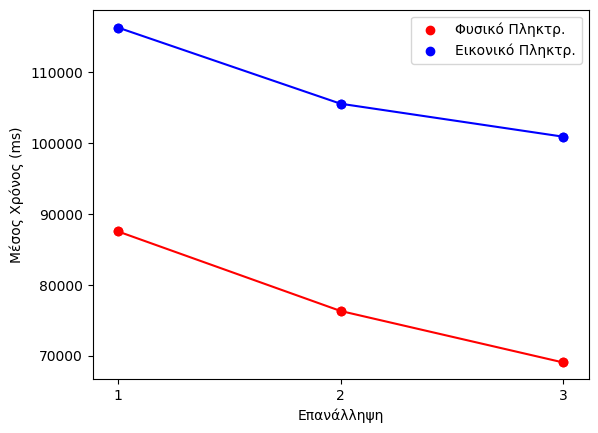

In [45]:
# Set up the plot
fig, ax = plt.subplots()

# Scatter plot and connect lines for the first set of three values
ax.scatter(range(1, 4), df_stats.iloc[1, :3], label='Φυσικό Πληκτρ.', color='red', marker='o')
ax.plot(range(1, 4), df_stats.iloc[1, :3], color='red', linestyle='-', marker='o')

# Scatter plot and connect lines for the next set of three values
ax.scatter(range(1, 4), df_stats.iloc[1, 3:], label='Εικονικό Πληκτρ.', color='blue', marker='o')
ax.plot(range(1, 4), df_stats.iloc[1, 3:], color='blue', linestyle='-', marker='o')

# Add labels and legend
ax.set_xlabel('Επανάλληψη')
ax.set_ylabel('Μέσος Χρόνος (ms)')
ax.set_xticks(range(1, 4))  # Set x-axis ticks to 1, 2, and 3
ax.legend()

# Show the plot
plt.show()